# Social Distance: Load, clean and store Dataframe

In [ ]:
#Import packages for data wrangling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import os

#Ignore warnings from code output
import warnings
warnings.filterwarnings(action = 'ignore')

In [6]:
#Eplore one file with observations from 2020-01-01
file_path_safegraph = 'C:\\Users\\josem\\mylocaldirectory\\v1\\2020\\01\\01\\2020-01-01-social-distancing.csv.gz'
df1 = pd.read_csv(file_path_safegraph)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219247 entries, 0 to 219246
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   origin_census_block_group                   219247 non-null  int64  
 1   date_range_start                            219247 non-null  object 
 2   date_range_end                              219247 non-null  object 
 3   device_count                                219247 non-null  int64  
 4   distance_traveled_from_home                 219237 non-null  float64
 5   bucketed_distance_traveled                  219237 non-null  object 
 6   median_dwell_at_bucketed_distance_traveled  219237 non-null  object 
 7   completely_home_device_count                219247 non-null  int64  
 8   median_home_dwell_time                      219247 non-null  int64  
 9   bucketed_home_dwell_time                    219247 non-null  object 
 

['origin_census_block_group',
 'date_range_start',
 'date_range_end',
 'device_count',
 'distance_traveled_from_home',
 'bucketed_distance_traveled',
 'median_dwell_at_bucketed_distance_traveled',
 'completely_home_device_count',
 'median_home_dwell_time',
 'bucketed_home_dwell_time',
 'at_home_by_each_hour',
 'part_time_work_behavior_devices',
 'full_time_work_behavior_devices']

In [12]:
# Set my local directory for all Safegraph files
my_local_directory = 'C:\\Users\\josem\\mylocaldirectory\\v1\\2020'

In [13]:
# Iterate over each file and load relevant info in a dataframe
import os
df_safegraph = pd.DataFrame(columns = ['origin_census_block_group','date_range_start','date_range_end',
                                    'device_count', 'distance_traveled_from_home','completely_home_device_count',
                                    'median_home_dwell_time'])

#Use os.walk function to get the stored files in the subdirectories for months and days
for root, dirs, files in os.walk(my_local_directory):
   
    #print(files)
    for file in files:
        
        if file.endswith(".csv.gz"):
            #print((os.path.join(root, file)))
            file_path_safegraph = os.path.join(root, file)
            df = pd.read_csv(file_path_safegraph, usecols = ['origin_census_block_group',
                                                                       'date_range_start',
                                                                       'date_range_end',
                                                                       'device_count',
                                                                       'distance_traveled_from_home',
                                                                       'completely_home_device_count',
                                                                       'median_home_dwell_time'])
            #On Safegraph data set, identify FIPS per state and county
            df['origin_census_block_group'] = df['origin_census_block_group'].astype(str)
            #add zeros in census block groups shorter than 12 digits
            df['origin_census_block_group'] = [i.zfill(12) for i in df['origin_census_block_group']]
            #Create a column with a subset of the first 5 digits of origin_census_block_group
            df['FIP_state_county'] = [i[:5] for i in df['origin_census_block_group']]
            
            #Concatenate results in a dataframe 
            df_safegraph = pd.concat([df_safegraph, df])               

In [14]:
#Create a column with a subset of the first 5 digits of origin_census_block_group
df_safegraph['FIP_state_county'] = [i[:5] for i in df_safegraph['origin_census_block_group']]

In [15]:
#Download data set with FIPS data information
file_path_FIPS = 'C:\\Duke University\\2nd Term\\Practical DS 690-2\\Final Project\\FIPS_State_County.csv'
FIPS_df = pd.read_csv(file_path_FIPS)

#On FIPS data set to prepare the merge of data
FIPS_df['FIPS'] = FIPS_df['FIPS'].astype(str)
#add zeros in FIPS shorter than 5 digits
FIPS_df['FIPS'] = [i.zfill(5) for i in FIPS_df['FIPS']]

In [16]:
#Merge dataframes and incorporate state and county information
safegraph = pd.merge(df_safegraph, FIPS_df, left_on = 'FIP_state_county', right_on = 'FIPS')

In [2]:
import os
os.getcwd()
safegraph.to_csv(r'C:\\Duke University\\2nd Term\\Practical DS 690-2\\Final Project\\Full_Safegraph.csv', index = False)

'C:\\Users\\josem\\Python\\IDS 690 - 2'

## Plot safegraph at State and County Levels

In [24]:
#Download data set
safegraph = pd.read_csv('C:\\Duke University\\2nd Term\\Practical DS 690-2\\Final Project\\Full_Safegraph.csv')

#Strip last 6 characters in date_range_start and date_range_end
safegraph['date_range_start'] = [i[:-6] for i in safegraph['date_range_start']]
safegraph['date_range_end'] = [i[:-6] for i in safegraph['date_range_end']]

In [25]:
safegraph.describe()

,origin_census_block_group,device_count,distance_traveled_from_home,completely_home_device_count,median_home_dwell_time,FIP_state_county,FIPS
count,2.434212e+07,2.434212e+07,2.434137e+07,2.434212e+07,2.434212e+07,2.434212e+07,2.434212e+07
mean,2.867323e+11,8.208309e+01,1.014692e+04,2.275484e+01,6.905449e+02,2.867297e+04,2.867297e+04
std,1.637511e+11,9.712216e+01,6.959522e+04,2.830702e+01,2.942913e+02,1.637510e+04,1.637510e+04
min,1.001020e+10,5.000000e+00,3.800000e+01,1.000000e+00,0.000000e+00,1.001000e+03,1.001000e+03
25%,1.312101e+11,4.000000e+01,4.017000e+03,1.000000e+01,5.750000e+02,1.312100e+04,1.312100e+04
50%,2.900795e+11,6.200000e+01,6.143000e+03,1.700000e+01,7.380000e+02,2.900700e+04,2.900700e+04
75%,4.200348e+11,9.800000e+01,9.497000e+03,2.800000e+01,8.560000e+02,4.200300e+04,4.200300e+04
max,7.803099e+11,6.235500e+04,1.298593e+07,1.251000e+04,2.113000e+03,7.803000e+04,7.803000e+04


In [26]:
safegraph.columns.to_list()

['origin_census_block_group',
 'date_range_start',
 'date_range_end',
 'device_count',
 'distance_traveled_from_home',
 'completely_home_device_count',
 'median_home_dwell_time',
 'FIP_state_county',
 'FIPS',
 'Name',
 'State']

In [49]:
#Select a subset of columns for analysis
safe_subset = safegraph[['date_range_start',
 'date_range_end',
 'device_count',
 'distance_traveled_from_home',
 'completely_home_device_count',
 'median_home_dwell_time',
 'Name',
 'State']]

In [28]:
#Convert columns date_range_start and date_range_end to datetime format
safe_subset.rename(columns = {'Name':'County'}, inplace=True)

#Convert into datetime format
safe_subset['date_start'] = pd.to_datetime(safe_subset['date_range_start'])
safe_subset['date_end'] = pd.to_datetime(safe_subset['date_range_end'])

In [29]:
#Convert columns device_count, completely_home_device_count and median_home_dwell_time into integer data type
safe_subset['device_count'] = safe_subset['device_count'].astype(int)
safe_subset['completely_home_device_count'] = safe_subset['completely_home_device_count'].astype(int)
safe_subset['median_home_dwell_time'] = safe_subset['median_home_dwell_time'].astype(int)

In [30]:
#Plot individula metric 'median_home_dwell_time'
safe_subset = safe_subset[['County',
 'State',
 'date_start',
 'median_home_dwell_time'
 ]]

In [31]:
#Set unit of observation as combination of County and State
safe_plot = safe_subset.groupby(['date_start', 'County', 'State'], as_index=False).sum()

In [32]:
#Set date_start as index
safe_plot.set_index('date_start', inplace=True)

In [37]:
#Select county and state for plotting
state = ['CA']
counties = ['Alameda', 'Sacramento', 'San Bernardino',
       'San Diego', 
       'San Francisco',
       'Santa Clara', 'San Mateo']
test1 = safe_plot.loc[(safe_plot.State.isin(state)) & (safe_plot.County.isin(counties))]
test1['median_home_dwell_time'] = test1['median_home_dwell_time']/60

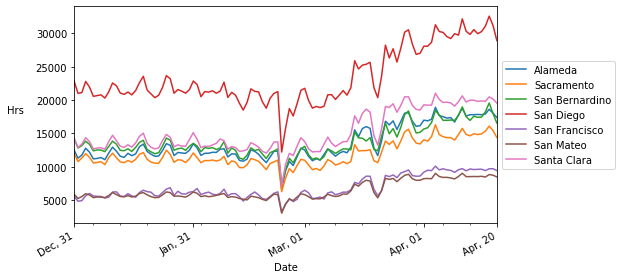

In [48]:
from matplotlib import dates as mpl_dates
#Test another plotting style
#plt.style.use('seaborn')

#Scatter plot
#plt.plot_date(x= test1.index, y=test1['median_home_dwell_time'])

#Trend Line plot for one county
#plt.plot(test1['median_home_dwell_time'])

#Trend Lines plot for multiple counties per state
test1.pivot(columns = 'County', values = 'median_home_dwell_time').plot()
#df.pivot(index="Date", columns="Group", values="Value").plot()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol =1)
plt.tight_layout()
#plt.title("Median home dwell time in some California's Counties")
plt.xlabel('Date')
plt.ylabel('Hrs', rotation = 0, labelpad = 20)
plt.gcf().set_size_inches(10,4)
plt.show()

In [140]:
safegraph.loc[safegraph.State == 'CA']['Name'].unique()

array(['Alameda', 'Fresno', 'Lake', 'Los Angeles', 'Nevada', 'Orange',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Joaquin', 'Sonoma', 'Ventura', 'Yolo', 'Glenn',
       'Kern', 'Kings', 'Mendocino', 'Placer', 'San Francisco',
       'San Luis Obispo', 'Santa Barbara', 'Santa Clara', 'Solano',
       'Tulare', 'Monterey', 'San Mateo', 'Shasta', 'Imperial', 'Inyo',
       'Contra Costa', 'El Dorado', 'Siskiyou', 'Sutter', 'Merced',
       'Amador', 'Napa', 'Stanislaus', 'Madera', 'Marin', 'Humboldt',
       'Santa Cruz', 'Modoc', 'Mariposa', 'Butte', 'Lassen', 'Tehama',
       'Del Norte', 'Plumas', 'Yuba', 'Calaveras', 'Tuolumne', 'Colusa',
       'Mono', 'Sierra', 'Trinity', 'Alpine'], dtype=object)